# <Google developer ML 단기 집중 과정>
## TF 첫걸음: 합성 데이터를 사용한 선형 회귀 실습

https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises?hl=ko
    
    

## 학습목표

#### 2023.05.23


  * 하이퍼 파라미터 튜닝
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * 다른 손실 커브 해석하기 (https://developers.google.com/machine-learning/glossary/#loss_curve).

# 1. 모듈 import

In [8]:
# pip install tensorflow

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# 2. 모델 만들고 학습하기

다음의 두 함수를 정의하라

  * `build_model(my_learning_rate)`; 빈 모델을 만드는 함수
  * `train_model(model, feature, label, epochs)`,모델을 학습시키는 함수


* `keras.layers.Dense`에 대한 설명: https://www.tensorflow.org/api_docs/python/tf/keras/layers

Just your regular densely-connected NN layer.


* `model.colpile`에 대한 설명: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

training to minimize the model's mean squared error.

In [9]:
def build_model(my_learning_rate):
    """단순 선형 회귀 모델을 만들고 컴파일하는 함수"""
    
    model = tf.keras.models.Sequential()
    
    
    model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
    

    
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

print("Define build_model!")

Define build_model!


* `model.fit`: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

Trains the model for a fixed number of epochs (dataset iterations).


* `Sequential.get_weights()`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#load_weights



In [7]:
def train_model(model, feature, label, epochs, batch_size):
    """모델에 데이터를 넣어 학습시키는 함수"""
    
    history = model.fit(x=feature,
                       y= label,
                       batch_size = batch_size,
                       epochs = epochs)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    
    epochs = history.epoch
    
    # 각 epochs에서 rmse를 모음
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse
    
    
print("Define train_model!")

Define train_model!


# 3. plotting 함수 정의하기



학습 모델의 예측치와 손실을 시각화하기 위한 함수

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).


In [42]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """피쳐와 라벨에 대하여 학습 모델의 plot을 그리는 함수"""
    
    # 축 설정
    plt.xlabel("feature")
    plt.ylabel("lable")
    
    
    # 관측치로 산점도 그리기
    plt.scatter(feature, label)
    
    
    # 모델의 예측값에 대하여 붉은선 표시
    x0 = 0
    y0 = trained_bias
    
    x1 = feature[-1]  # x축의 마지막 요소
    y1 = trained_bias + (trained_weight * x1)  # y = w1x1 + b # 모델의 예측값
    
    plt.plot([x0, x1], [y0, y1], c='r')          # plt.plot(x,y, color = 'red')
    
    plt.show()
    
print("Define plot_the_model function!")

Define plot_the_model function!


In [23]:
def plot_the_loss_curve(epochs, rmse):
    """손실과 epoch를 보여주는 손실 커브를 그리는 함수"""
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Rood Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show
    
print("Define plot_the_loss_curve function!")

Define plot_the_loss_curve function!


# 4. 모델 학습에 사용할 데이터셋 생성

12개의 example로 이뤄진 데이터셋을 만든다.

해당 example은 하나의 feature와 하나의 label로 이루어져 있다.

In [43]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# 5. 하이퍼 파라미터 구체화하기


해당 훈련에서 `learning rate`, `epochs`, `batch size`를 hyperparameters로 사용한다.

* `learning rate` = 학습률. 각 iteration마다 얼마의 강도로 가중치와 편향을 조절할지에 관한 실수형의 숫자이다. 
학습률이 지나치게 작으면 최솟값에 도달하기 위해 굉장히 많은 연산이 요구되지만, 반대로 지나치게 크다면 연산을 하면할수록 최솟값에서 점점 멀어지게 된다. 그렇기 때문에 적절한 Learning Rate를 설정하는 것은 매우 중요합니다.

* `batch` = 모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음을 의미. n = 1000개인 데이터셋에서 batch=20 이면 데이터 20개마다 가중치가 한번씩 업데이트 된다.


* `epochs` = 에포크. 학습횟수를 의미. n = 1000이고 batch = 20 이며 epochs = 10이라면 가중치가 업데이트되는 50번이 총 10번 일어난다. 즉, 가중치는 500번 업데이트된다.


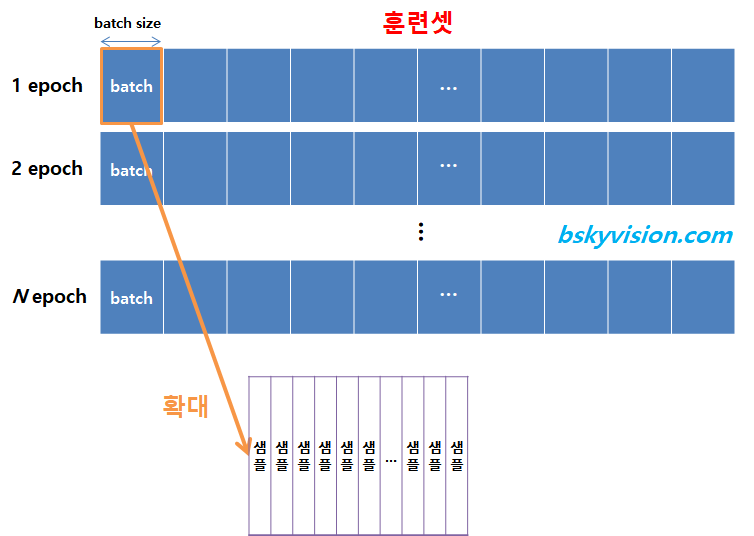

In [52]:
learning_rate = 0.01


# epoch = (N/batch size) = (1,000 / 50) = 20 iteration
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)


trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

Epoch 1/10
1/1 [==============================] - 0s 193ms/step - loss: 250.7998 - root_mean_squared_error: 15.8367
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 242.6132 - root_mean_squared_error: 15.5760
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 236.8054 - root_mean_squared_error: 15.3885
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 232.0198 - root_mean_squared_error: 15.2322
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 227.8280 - root_mean_squared_error: 15.0940
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 224.0317 - root_mean_squared_error: 14.9677
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 220.5209 - root_mean_squared_error: 14.8499
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 217.2269 - root_mean_squared_error: 14.7386
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 214.1041 - root_

C:\Users\Playdata\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


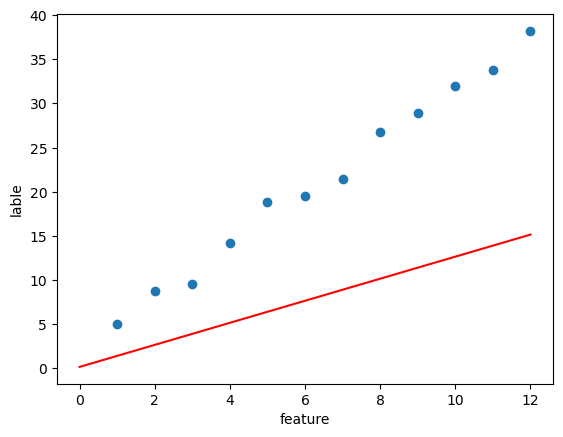

In [53]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

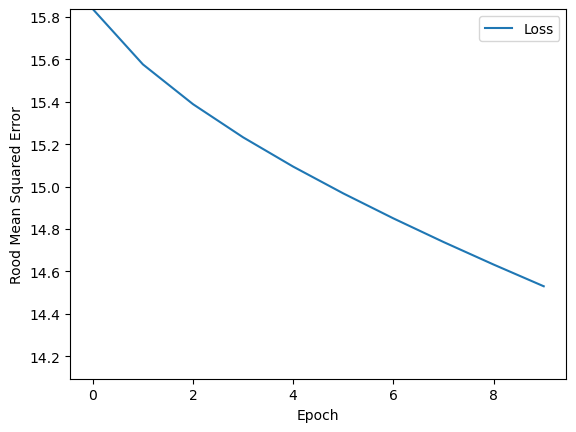

In [54]:
plot_the_loss_curve(epochs,rmse)

# Task 1: 그래프를 설명하라



* 파란점은 관측치(actual data)이고, 붉은선은 훈련모델의 결과값(예측값)이다.


* 예측값은 모델을 돌릴 때마다 조금씩 그 결과가 달라진다


* 손실 곡선을 보여주는 맨 아래 그래프를 조사합니다. 손실 곡선이 감소하지만 평평해지지 않는다는 것은 모형이 충분히 훈련되지 않았다는 것을 나타냅니다.

# Task 2: epochs의 값을 증가시켜라


훈련 손실(training loss)는 처음엔 가파르게 줄어들다가 갈수록 점점 완만하게 감소한다. 결국 점점 일정하게 유지되는데 이를 `수렴(converged)`하였다고 본다.



Task 1에서의 loss curve에서는 수렴하지 않는다. 이를 해결하는 방법 중 하나는 `epochs를 늘려서 훈련시키는 것`이다. 모델의 손실 커브가 수렴하도록 epochs를 충분히 늘려보자. 


In [57]:
# 하이퍼 파라미터 설정
learning_rate=0.01
epochs= 450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

Epoch 1/450
1/1 [==============================] - 0s 161ms/step - loss: 431.9054 - root_mean_squared_error: 20.7823
Epoch 2/450
1/1 [==============================] - 0s 4ms/step - loss: 421.1329 - root_mean_squared_error: 20.5215
Epoch 3/450
1/1 [==============================] - 0s 6ms/step - loss: 413.4493 - root_mean_squared_error: 20.3335
Epoch 4/450
1/1 [==============================] - 0s 7ms/step - loss: 407.0934 - root_mean_squared_error: 20.1766
Epoch 5/450
1/1 [==============================] - 0s 6ms/step - loss: 401.5078 - root_mean_squared_error: 20.0377
Epoch 6/450
1/1 [==============================] - 0s 7ms/step - loss: 396.4347 - root_mean_squared_error: 19.9107
Epoch 7/450
1/1 [==============================] - 0s 6ms/step - loss: 391.7303 - root_mean_squared_error: 19.7922
Epoch 8/450
1/1 [==============================] - 0s 6ms/step - loss: 387.3056 - root_mean_squared_error: 19.6801
Epoch 9/450
1/1 [==============================] - 0s 6ms/step - loss: 383.100

C:\Users\Playdata\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


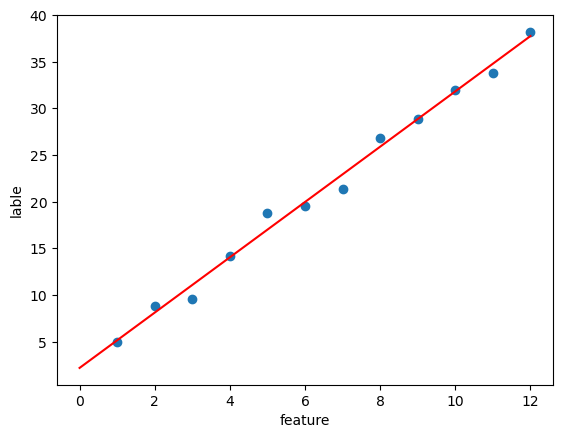

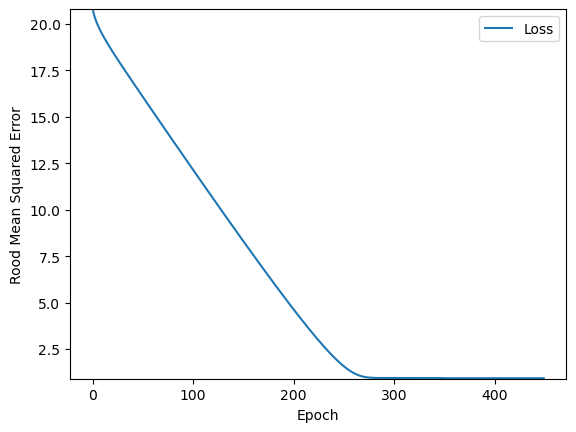

In [58]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 3. learning rate를 증가시키는 방법

Task 2에서 수렴을 위해 epochs값을 증가시켰었다. 때로는 수렴을 위해 learning rate를 증가시키는 것이 더 빠를 때가 있다. 

하지만 learning rate를 크게 잡는 것이 오히려 수렴을 불가능하게 할 때도 있다.

Epoch 1/500
1/1 [==============================] - 0s 160ms/step - loss: 266.1626 - root_mean_squared_error: 16.3145
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 6731884.0000 - root_mean_squared_error: 2594.5874
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 264.6531 - root_mean_squared_error: 16.2682
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 1.8549 - root_mean_squared_error: 1.3620
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8971 - root_mean_squared_error: 0.9472
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8835 - root_mean_squared_error: 0.9399
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8821 - root_mean_squared_error: 0.9392
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8816 - root_me

C:\Users\Playdata\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


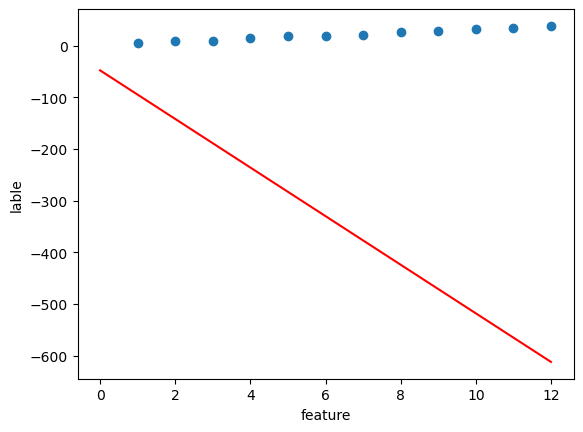

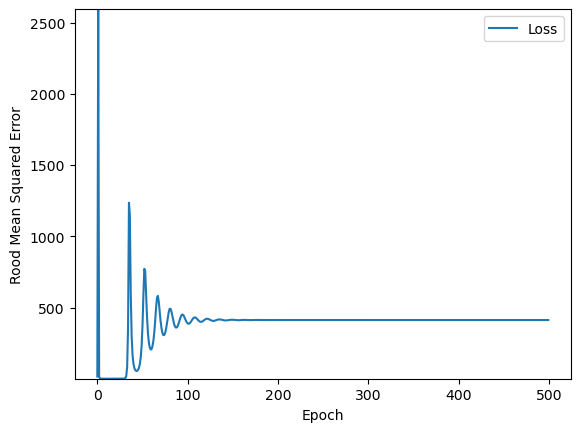

In [59]:
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

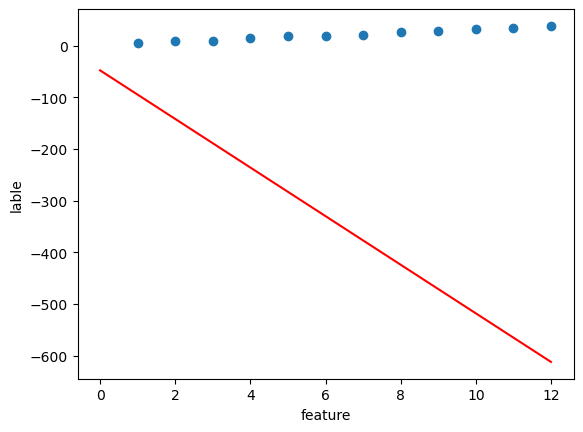

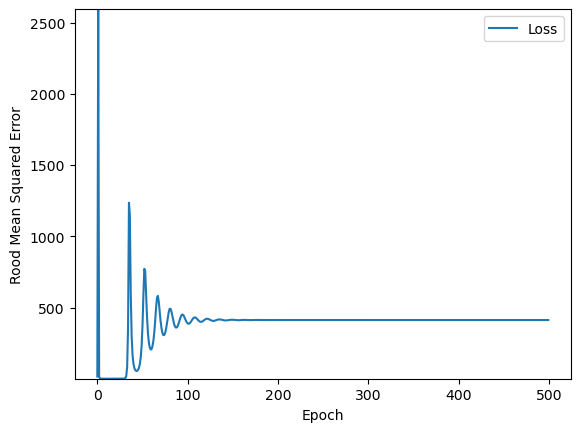

In [60]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

다음의 결과를 보면 붉은선이 파란점에 맞지 않으며, 손실 곡선은 진동하는 모양으로 롤러코스터와 비슷한 모양이다. 

다음과 같은 진동 손실 곡선은 l`earning rate가 너무 크게 잡혔다는 것을 시사`하기도 한다.

# Task 4. 이상적인 epochs와 learning rate 찾기

훈련 수렴을 만드는 가장 이상적인 하이퍼 파라미터 값을 배정하라.

Epoch 1/70
1/1 [==============================] - 0s 167ms/step - loss: 923.7098 - root_mean_squared_error: 30.3926
Epoch 2/70
1/1 [==============================] - 0s 6ms/step - loss: 715.0518 - root_mean_squared_error: 26.7405
Epoch 3/70
1/1 [==============================] - 0s 7ms/step - loss: 588.4416 - root_mean_squared_error: 24.2578
Epoch 4/70
1/1 [==============================] - 0s 7ms/step - loss: 495.8742 - root_mean_squared_error: 22.2682
Epoch 5/70
1/1 [==============================] - 0s 6ms/step - loss: 422.9607 - root_mean_squared_error: 20.5660
Epoch 6/70
1/1 [==============================] - 0s 4ms/step - loss: 363.1995 - root_mean_squared_error: 19.0578
Epoch 7/70
1/1 [==============================] - 0s 7ms/step - loss: 313.0219 - root_mean_squared_error: 17.6924
Epoch 8/70
1/1 [==============================] - 0s 5ms/step - loss: 270.2264 - root_mean_squared_error: 16.4386
Epoch 9/70
1/1 [==============================] - 0s 5ms/step - loss: 233.3428 - root_

C:\Users\Playdata\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


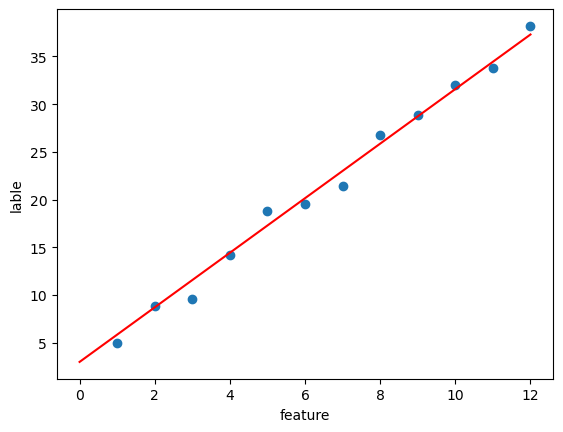

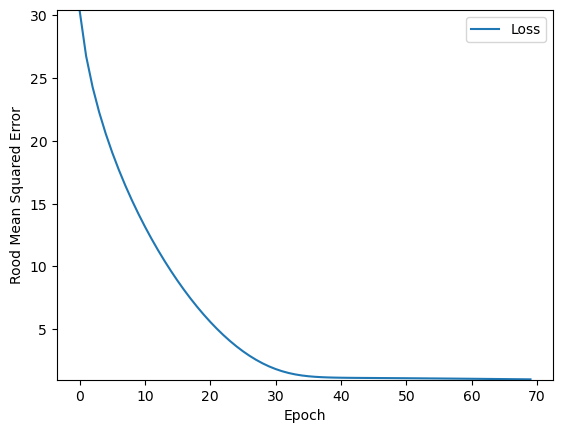

In [61]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 5. batch size를 조절하라

시스템은 모델의 손실값 계산과 가중치와 편향 조절을 각 반복마다 시행한다. 즉, batch size가 6이면 시스템은 모델의 손실을 6면 계산하고, 가중치와 편향을 6번 조절한다.



배치 크기를 단순히 데이터 세트의 예제 수(이 경우 12)로 설정하는 것이 좋다. 해당 모델에서는 더 작은 배치에서 더 빨리 훈련되는 경우이다. 배치가 너무 작을 경우 모델 수렴에 도움이 되는 충분한 정보가 포함되어 있지 않을 수 있으므로 주의가 필요하다.


Epoch 1/15
12/12 [==============================] - 0s 1ms/step - loss: 713.3915 - root_mean_squared_error: 26.7094
Epoch 2/15
12/12 [==============================] - 0s 1ms/step - loss: 493.0622 - root_mean_squared_error: 22.2050
Epoch 3/15
12/12 [==============================] - 0s 1ms/step - loss: 344.7391 - root_mean_squared_error: 18.5672
Epoch 4/15
12/12 [==============================] - 0s 1ms/step - loss: 231.7493 - root_mean_squared_error: 15.2233
Epoch 5/15
12/12 [==============================] - 0s 1ms/step - loss: 147.7486 - root_mean_squared_error: 12.1552
Epoch 6/15
12/12 [==============================] - 0s 1ms/step - loss: 85.1507 - root_mean_squared_error: 9.2277
Epoch 7/15
12/12 [==============================] - 0s 1ms/step - loss: 41.4222 - root_mean_squared_error: 6.4360
Epoch 8/15
12/12 [==============================] - 0s 1ms/step - loss: 16.6420 - root_mean_squared_error: 4.0795
Epoch 9/15
12/12 [==============================] - 0s 1ms/step - loss: 5.5889

C:\Users\Playdata\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


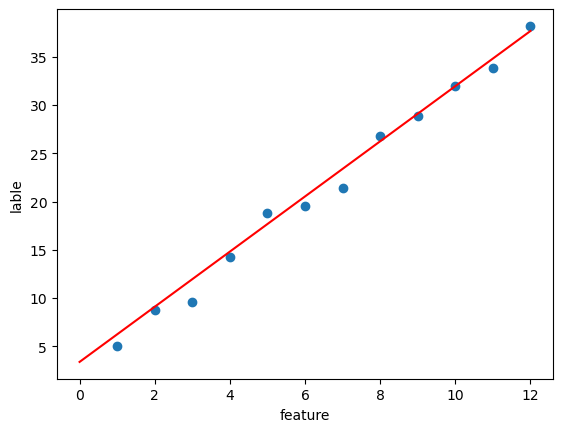

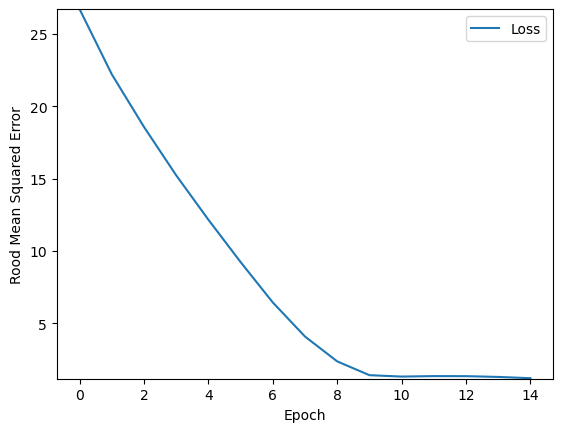

In [63]:
learning_rate=0.05
epochs=15
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# 하이퍼파라미터 튜닝 요약

대부분의 머신러닝 문제에서 하이러 파라미터 튜닝이 요구된다. 학습률을 낮추는 것이 어떤 모델에서는 모델 수렴에 도움이 될 수 있지만 다른 모델에서는 그렇지 못한 경우도 있다. 따라서 사용하는 데이터셋의 특성에 맞게 하이퍼 파라미터를 조정하는 것이 중요하다.



* 학습 손실은 처음에 급격히 줄어들다 0에 가까워질수록 점점 완만하게 줄어든다(수렴)

* 만약 학습 손실이 수렴하지 않는다면(손실 커브를 통해 확인), epochs를 늘려볼 것.

* 학습 손실이 너무 느리게 감소한다면, 학습률을 높여볼 것. 하지만 학습률을 너무 높이는 것은 수렴에 도움이 되지 않는다.

* 만약 학습 손실이 진동하며 변한다면 학습률을 줄여볼 것.

* 학습률을 줄이면서 batch와 epoch를 올리는 것은 좋은 조합이 되는 경우가 많다.

* batch를 크게 잡고 점점 줄여나가며 이상적인 batch를 찾는 방법을 추천

* 현실의 데이터셋은 매우 많은 example로 이뤄져 있는 경우가 많다. 따라서 example의 개수와 batch의 개수를 맞추면 메모리가에 맞지 않을 수 있기때문에 메모리에 맞게 batch size를 줄이는 것이 좋다 



명심할 것: 이상적인 하이퍼파라미터의 조합은 데이터의 달려있다. 따라서 데이터에 따라 시험하고 증명해볼 것.